In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv(r"C:\Users\chand\Downloads\titanic_dataset.csv",index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 

### Basic Data Exploration

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [11]:
# Checking Null Values


data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
# Removing unwanted columns 

data=data.drop(['Name','Ticket','Cabin'],axis=1)

In [24]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [25]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [45]:
# Replacing missing values of Age with mean values

data['Age'] = data['Age'].fillna(data['Age'].median())

# Replacing missing values of Embarked with mean values

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode().values[0])

data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

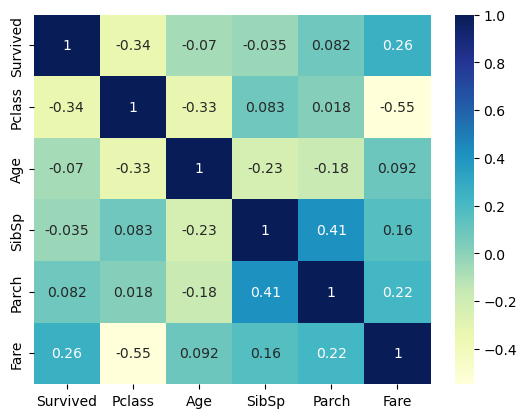

In [46]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [192]:
# Encoding Using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])

In [193]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,29.699118,1,0,7.2500,2
2,1,1,0,29.699118,1,0,14.4542,0
3,1,3,0,26.000000,0,0,7.9250,2
4,1,1,0,29.699118,1,0,14.4542,2
5,0,3,1,29.699118,0,0,8.0500,2


In [194]:
x=data.drop('Survived',axis= 1)
y=data['Survived']

In [195]:
# splitting data into train and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.2)

_____

#  SVM Model

In [121]:
from sklearn.svm import SVC

In [122]:
# SVM Model (Kernel = Linear)

svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred=svm_cls.predict(x_test)

In [123]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [124]:
confusion_matrix(y_test,y_pred)

array([[88, 17],
       [22, 52]], dtype=int64)

In [125]:
accuracy_score(y_test,y_pred)

0.7821229050279329

Accuracy of the SVM-Linear model for this data set is 78%

_____

In [144]:
# SVM Model (Kernel = rbf)

svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)
y_pred=svm_cls1.predict(x_test)

In [145]:
accuracy_score(y_test,y_pred)

0.6312849162011173

Accuracy of the SVM-rbf model for this data set is 63%

# Cross Validation of SVM Model

### 1) k-Fold 

In [149]:
from sklearn.model_selection import KFold
kfold_validator = KFold(25)

    

In [196]:
# Cross validation of svm(linear)

from sklearn.model_selection import cross_val_score
cv_result = cross_val_score(svm_cls,x,y,cv= kfold_validator )
cv_result

array([0.52777778, 0.55555556, 0.69444444, 0.61111111, 0.72222222,
       0.66666667, 0.83333333, 0.75      , 0.66666667, 0.66666667,
       0.72222222, 0.75      , 0.69444444, 0.77777778, 0.69444444,
       0.63888889, 0.77142857, 0.77142857, 0.68571429, 0.68571429,
       0.74285714, 0.85714286, 0.74285714, 0.65714286, 0.77142857])

In [197]:
np.mean(cv_result)

0.7063174603174602

In [198]:
# Cross validation of svm(rbf)

from sklearn.model_selection import cross_val_score
cv_result1 = cross_val_score(svm_cls1,x,y,cv= kfold_validator )
cv_result1

array([0.52777778, 0.55555556, 0.69444444, 0.61111111, 0.72222222,
       0.66666667, 0.83333333, 0.75      , 0.66666667, 0.66666667,
       0.72222222, 0.75      , 0.69444444, 0.77777778, 0.69444444,
       0.63888889, 0.77142857, 0.77142857, 0.68571429, 0.68571429,
       0.74285714, 0.85714286, 0.74285714, 0.65714286, 0.77142857])

In [199]:
np.mean(cv_result1)

0.7063174603174602

### Average accuracy score of the SVM models under k-Fold cross validation is 0.71

### 2) Stratified k-Fold

In [168]:
from sklearn.model_selection import StratifiedKFold
skfold_validator= StratifiedKFold(n_splits = 25)

In [169]:
cv_result2 = cross_val_score(svm_cls,x,y,cv= skfold_validator )
cv_result2

array([0.55555556, 0.58333333, 0.66666667, 0.58333333, 0.66666667,
       0.69444444, 0.88888889, 0.66666667, 0.77777778, 0.69444444,
       0.80555556, 0.69444444, 0.75      , 0.69444444, 0.75      ,
       0.58333333, 0.8       , 0.74285714, 0.65714286, 0.77142857,
       0.77142857, 0.8       , 0.8       , 0.68571429, 0.77142857])

In [170]:
np.mean(cv_result2)

0.7142222222222222

### Average accuracy score of the SVM models under stratified k-Fold cross validation is 0.71

_______

# kNN Model

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
# For Finding a Better k-Value

metric_k=[]
neighbors=np.arange(3,25)

In [182]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

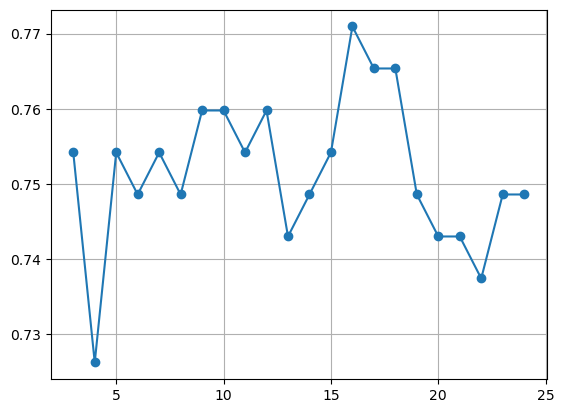

In [183]:
plt.plot(neighbors,metric_k,'o-');
plt.grid()

In [184]:
# From the above graph , value of k is taken as 16

classifier=KNeighborsClassifier(n_neighbors=16,metric = 'euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [185]:
confusion_matrix(y_test,y_predictions)

array([[97,  8],
       [33, 41]], dtype=int64)

In [186]:
accuracy_score(y_test,y_predictions)

0.770949720670391

Accuracy of the kNN model for this data set is 77%

# Cross Validation of kNN Model

### 1) k-Fold

In [187]:
from sklearn.model_selection import cross_val_score
cv_result3 = cross_val_score(classifier,x,y,cv= kfold_validator )
cv_result3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0.69444444, 0.69444444, 0.77777778, 0.75      , 0.83333333,
       0.66666667, 0.75      , 0.69444444, 0.77777778, 0.77777778,
       0.80555556, 0.75      , 0.66666667, 0.66666667, 0.80555556,
       0.61111111, 0.8       , 0.74285714, 0.62857143, 0.74285714,
       0.71428571, 0.77142857, 0.77142857, 0.65714286, 0.77142857])

In [188]:
np.mean(cv_result3)

0.7328888888888889

### Average accuracy score of the kNN models under k-Fold cross validation is 0.73

### 2) Stratified k-Fold

In [189]:
cv_result4 = cross_val_score(classifier,x,y,cv= skfold_validator )
cv_result4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

array([0.69444444, 0.77777778, 0.72222222, 0.75      , 0.63888889,
       0.75      , 0.75      , 0.66666667, 0.80555556, 0.83333333,
       0.83333333, 0.75      , 0.72222222, 0.63888889, 0.75      ,
       0.61111111, 0.82857143, 0.71428571, 0.6       , 0.74285714,
       0.71428571, 0.68571429, 0.74285714, 0.68571429, 0.77142857])

In [191]:
np.mean(cv_result4)

0.7272063492063494

### Average accuracy score of the kNN models under stratified kFold cross validation is 0.73